In [203]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage import io

(-0.5, 499.5, 499.5, -0.5)

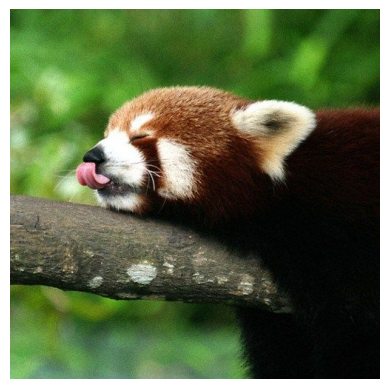

In [204]:
#wczytaj obrazek który będziemy obracać
obrazek = cv2.cvtColor(cv2.imread("C:/Users/matiu/OneDrive/Pulpit/pandka.jpg"), cv2.COLOR_BGR2RGB)
wysokosc, szerokosc, kanal = obrazek.shape
plt.imshow(obrazek)
plt.axis('off')

In [205]:
def interpoluj_piksel(obrazek, x, y):
    w, s, k = obrazek.shape  #wysokość, szerokość, kanł
    
    if np.all(obrazek[y, x] == [0, 0, 0]):
        nieczarne_piksele = []  #wszystkie poza nieczarnymi pikselami
        for i in range(y-1, y+2):
            for j in range(x-1, x+2):
                if 0 <= i < w and 0 <= j < s and not np.all(obrazek[i, j] == [0, 0, 0]):
                    nieczarne_piksele.append((j, i))

        if nieczarne_piksele:
            for kanal in range(obrazek.shape[2]):
                srednia = np.mean([obrazek[i, j, kanal] for j, i in nieczarne_piksele])
                obrazek[y, x, kanal] = srednia
    return obrazek[y, x]

In [206]:
def obracaj(obrazek,kat):
    obrazek2 = np.zeros((wysokosc, szerokosc, 3), dtype=np.uint8)
    
    for w in range(wysokosc):
      for s in range(szerokosc):
        o=obrazek[w][s]
        wek = np.array([[s-szerokosc/2],[w-wysokosc/2]])
        obracaj_macierz = np.array([[np.cos(kat), -np.sin(kat)],[np.sin(kat), np.cos(kat)]])
        wek_koncowy = np.dot(obracaj_macierz, wek)
        nowyx=int(wek_koncowy[0][0]+szerokosc/2)
        nowyy=int(wek_koncowy[1][0]+wysokosc/2)
        if nowyx<szerokosc and nowyx>0 and nowyy<wysokosc and nowyy>0:
          obrazek2[nowyy][nowyx]=o
    return obrazek2

In [207]:
def interpoluj_obraz(obrazek):
    w, s, k = obrazek.shape
    #najpierw interpolacja od lewej do prawej
    for y in range(w):
        for x in range(s):
            interpoluj_piksel(obrazek, x, y)

    #potem druga interpolacja od prawej do lewej
    for y in range(w-1, -1, -1):
        for x in range(s-1, -1, -1):
            interpoluj_piksel(obrazek, x, y)
    return obrazek

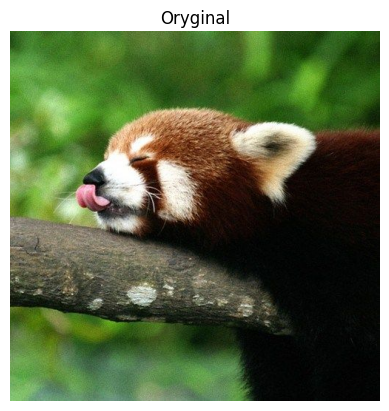

In [208]:
#wyświetlenie oryginalnego
plt.imshow(obrazek)
plt.title("Oryginal")
plt.axis('off')
plt.show()

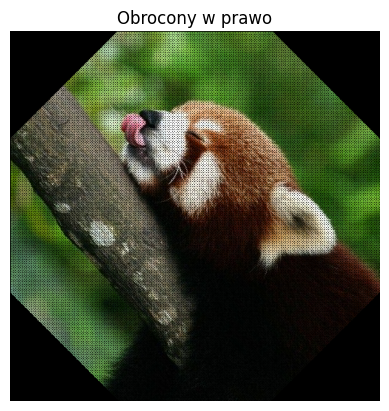

In [209]:
#wyświetlenie obrazu obróconego (obrócony nie będzie cały widoczny i będzie miał czarne rogi)
obrazek2 = obracaj(obrazek, np.radians(45))

plt.imshow(obrazek2)
plt.title("Obrocony w prawo")
plt.axis('off')
plt.show()

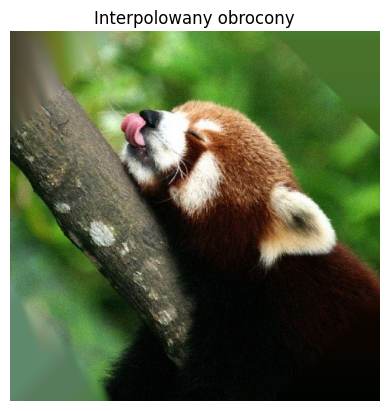

In [210]:
#wyświetlenie obróconego po interpolacji
obrazek2_interpolowane = interpoluj_obraz(obrazek2)

plt.imshow(obrazek2_interpolowane)
plt.title("Interpolowany obrocony")
plt.axis('off')
plt.show()

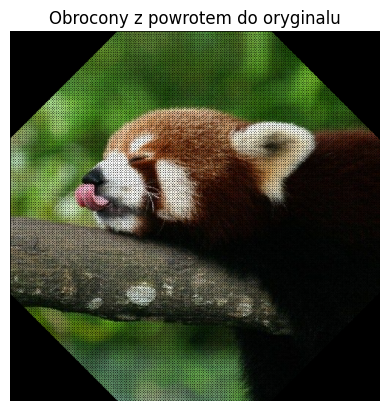

In [211]:
#wyświetlenie obrazka po drguim powrotnym obrocie
obrazek3 = obracaj(obrazek2_interpolowane, np.radians(-45))

plt.imshow(obrazek3)
plt.title("Obrocony z powrotem do oryginalu")
plt.axis('off')
plt.show()

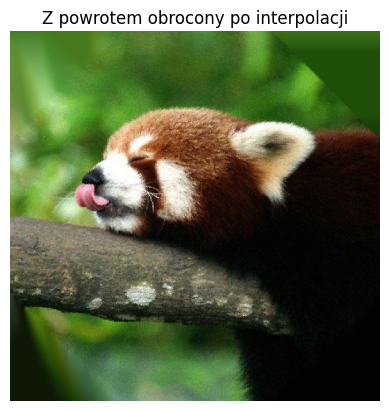

In [212]:
#wyświetlenie zinterpolowanego obrazka po drguim powrotnym obrocie
obrazek3_interpolowane = interpoluj_obraz(obrazek3)

plt.imshow(obrazek3_interpolowane)
plt.title("Z powrotem obrocony po interpolacji")
plt.axis('off')
plt.show()

Błąd: 53.46770933333333


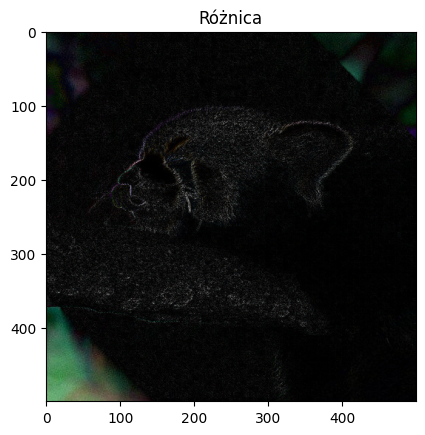

In [213]:
#obliczenie przykładowgeo błędu i wyświetlenie różnicy
blad = np.sum((obrazek-obrazek3_interpolowane)**2)/obrazek.size
print("Błąd:", blad)

plt.imshow(cv2.cvtColor(cv2.absdiff(obrazek, obrazek3_interpolowane), cv2.COLOR_BGR2RGB))
plt.title("Różnica")
plt.show()